In [91]:
import pandas as pd
import numpy as np
import os
from scipy.io.wavfile import read
import matplotlib.pyplot as plt

In [84]:
studyData = pd.read_csv("Covid19Study_June2021.csv", index_col="ParticipantID", sep=";")

In [85]:
folderPath = "./Recordings/"
recordings = os.listdir(folderPath)

In [76]:
numberOfParticipants = len(studyData)
fps = 44100
n_second = 2

44 khz = 44100 samples per second

In [89]:
# read in recordings
recording = []

for pid in studyData.index:
    filename = f"RecordingParticipant{pid}.wav"
    if filename in recordings:
        path = f"{folderPath}{filename}"
        wav = scipy.io.wavfile.read(path)[1]
    else:
        wav = np.zeros([fps*n_second, ])
    recording.append(wav.tolist())

studyData['Recording'] = recording

In [90]:
studyData

,Age,Sex,Covid19,Recording
ParticipantID,,,,
1,29,f,y,"[[137, 66], [140, 38], [91, 0], [4, -10], [-69..."
2,40,m,y,"[[611, 199], [609, -35], [565, -177], [673, 72..."
3,37,f,n,"[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0..."
4,40,m,n,"[[0, 0], [0, -1], [-1, 0], [-2, 0], [-1, -1], ..."
5,16,m,y,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...
196,20,m,n,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
197,33,m,n,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
198,27,f,y,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


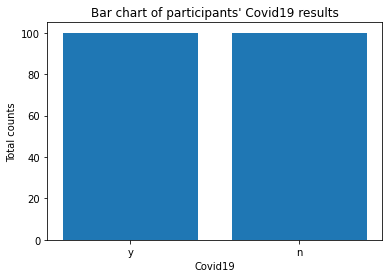

In [149]:
fig, ax = plt.subplots()

ax.bar(studyData.Covid19, max(studyData.Covid19.value_counts()))
ax.set_title("Bar chart of participants' Covid19 results")
ax.set_xlabel("Covid19")
ax.set_ylabel("Total counts")
plt.show()

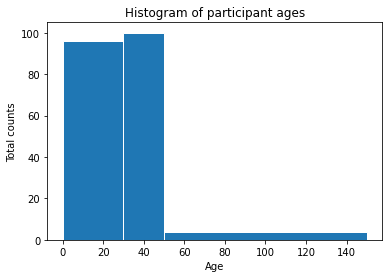

In [156]:
fig1, ax1 = plt.subplots()
ax1.hist(studyData.Age, bins=[0, 30, 50, 150], edgecolor='white')
ax1.set_title("Histogram of participant ages")
ax1.set_xlabel("Age")
ax1.set_ylabel("Total counts")
plt.show()

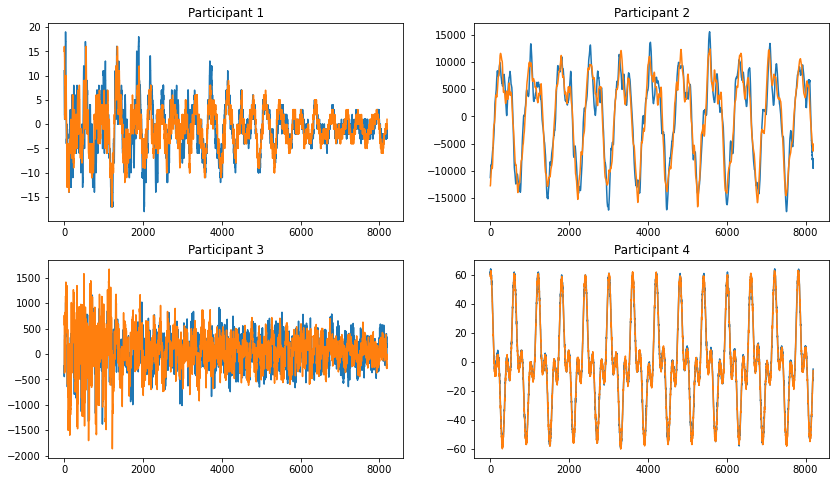

In [170]:
fig2, ax2 = plt.subplots(2, 2, figsize=(14, 8))

ax2[0, 0].plot(studyData.Recording[1][-8192:])
ax2[0, 0].set_title("Participant 1")

ax2[0, 1].plot(studyData.Recording[2][-8192:])
ax2[0, 1].set_title("Participant 2")

ax2[1, 0].plot(studyData.Recording[3][-8192:])
ax2[1, 0].set_title("Participant 3")

ax2[1, 1].plot(studyData.Recording[4][-8192:])
ax2[1, 1].set_title("Participant 4")

plt.show()